In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("plasma_data.csv")
print(data.head())

min_value = data['PlasmaRogA'].min()
max_value = data['PlasmaRogA'].max()

print("Минимальное значение PlasmaRogA:", min_value)
print("Максимальное значение PlasmaRogA:", max_value)
print("Среднее значение PlasmaRogA:", data['PlasmaRogA'].mean())
print("Диапазон:", max_value - min_value)


     I_arcSum  I_inj_total     OTor3  PlasmaRogA  V_InjD12
0 -122.122340   -36.782570 -0.050234   1522.2714       0.0
1  -99.876884   -36.619202  0.297072   1522.4329       0.0
2  -63.183563   -32.474251  0.297072   1522.5944       0.0
3  -51.625603   -21.405235 -0.050234   1522.7560       0.0
4  -52.962372   -17.626663 -0.050234   1522.9175       0.0
Минимальное значение PlasmaRogA: 66.707642
Максимальное значение PlasmaRogA: 1718.7438
Среднее значение PlasmaRogA: 1141.1388558197023
Диапазон: 1652.036158


     I_arcSum  I_inj_total     OTor3  PlasmaRogA  V_InjD12
0 -122.122340   -36.782570 -0.050234   1522.2714       0.0
1  -99.876884   -36.619202  0.297072   1522.4329       0.0
2  -63.183563   -32.474251  0.297072   1522.5944       0.0
3  -51.625603   -21.405235 -0.050234   1522.7560       0.0
4  -52.962372   -17.626663 -0.050234   1522.9175       0.0
Epoch 1/100


c:\Users\Guestff\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0265 - val_loss: 0.1809
Epoch 2/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0091 - val_loss: 0.1770
Epoch 3/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0082 - val_loss: 0.1782
Epoch 4/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0073 - val_loss: 0.1443
Epoch 5/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0064 - val_loss: 0.1246
Epoch 6/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0059 - val_loss: 0.1340
Epoch 7/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0057 - val_loss: 0.1190
Epoch 8/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0056 - val_loss: 0.1243
Epoch 9/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0055 - val_loss: 0.1178
Epoch 10/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0054 - val_loss: 0.1257
Epoch 11/100
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0053 - val_loss: 0.1181
Epoch 12/100
1311/1311 ━━━━━━━━

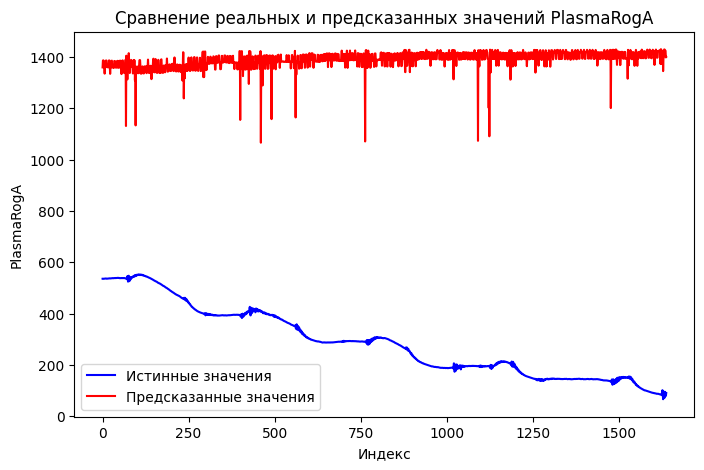

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

# 1. Импорт данных
data = pd.read_csv("plasma_data.csv")
print(data.head())

# 2. Разделение признаков и целевой переменной
X = data[['I_arcSum', 'I_inj_total', 'OTor3', 'V_InjD12']]
data['PlasmaRogA_delta'] = data['PlasmaRogA'].diff().fillna(0)
y = data['PlasmaRogA_delta']

# 3. Нормализация
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# 4. Разделение на обучающую и тестовую выборки
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_seq.shape[1], X_seq.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# 6. Оценка на тестовой выборке
loss = model.evaluate(X_test, y_test)
print("Среднеквадратичная ошибка (MSE) на тесте:", loss)

# 7. Предсказание и обратное масштабирование
y_pred_scaled = model.predict(X_test)
y_pred_delta = scaler_y.inverse_transform(y_pred_scaled)

# Интегрируем дельты, чтобы восстановить PlasmaRogA
y_test_original = scaler_y.inverse_transform(y_test)
y_pred = np.cumsum(y_pred_delta) + data['PlasmaRogA'].iloc[train_size + time_steps - 1]

# 8. Визуализация
plt.figure(figsize=(8,5))
plt.plot(y_test_original, label='Истинные значения', color='blue')
plt.plot(y_pred, label='Предсказанные значения', color='red')
plt.title('Сравнение реальных и предсказанных значений PlasmaRogA')
plt.xlabel('Индекс')
plt.ylabel('PlasmaRogA')
plt.legend()
plt.show()


results = pd.DataFrame({
    'PlasmaRogA_true': y_test_original.flatten(),
    'PlasmaRogA_pred': y_pred.flatten()
})

# Сохраняем в CSV
results.to_csv("plasma_predictions.csv", index=False)

     I_arcSum  I_inj_total     OTor3  PlasmaRogA  V_InjD12
0 -122.122340   -36.782570 -0.050234   1522.2714       0.0
1  -99.876884   -36.619202  0.297072   1522.4329       0.0
2  -63.183563   -32.474251  0.297072   1522.5944       0.0
3  -51.625603   -21.405235 -0.050234   1522.7560       0.0
4  -52.962372   -17.626663 -0.050234   1522.9175       0.0
Epoch 1/100


c:\Users\Guestff\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0463 - val_loss: 0.0065
Epoch 2/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0033 - val_loss: 0.0069
Epoch 3/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0033 - val_loss: 0.0066
Epoch 4/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0033 - val_loss: 0.0066
Epoch 5/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032 - val_loss: 0.0063
Epoch 6/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0032 - val_loss: 0.0065
Epoch 7/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032 - val_loss: 0.0071
Epoch 8/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032 - val_loss: 0.0065
Epoch 9/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031 - val_loss: 0.0066
Epoch 10/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031 - val_loss: 0.0063
Epoch 11/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031 - val_loss: 0.0061
Epoch 12/100
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

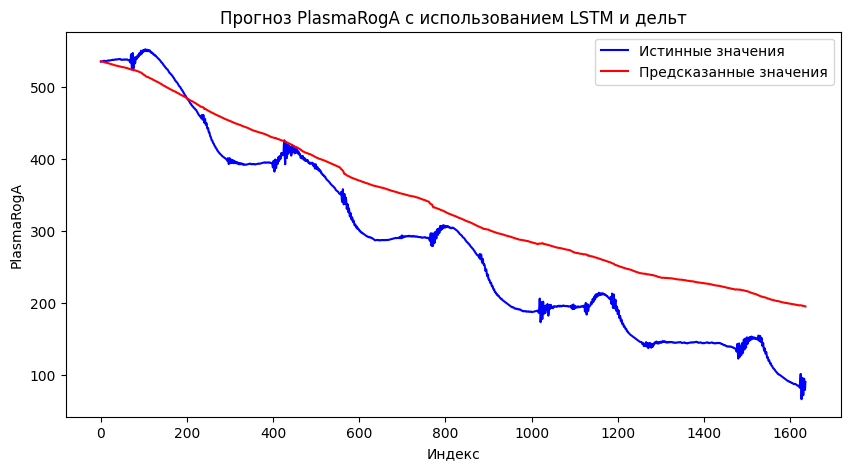

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. Импорт данных
data = pd.read_csv("plasma_data.csv")
print(data.head())

# 2. Признаки
X = data[['I_arcSum', 'I_inj_total', 'OTor3', 'V_InjD12']]

# 3. Новая целевая переменная: дельта PlasmaRogA
data['PlasmaRogA_delta'] = data['PlasmaRogA'].diff().fillna(0)
y = data['PlasmaRogA_delta']

# 4. Нормализация
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# 5. Преобразуем данные в последовательности для LSTM
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# 6. Разделение на обучающую и тестовую выборки
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# 7. Создание LSTM модели
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_seq.shape[1], X_seq.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 8. Обучение модели
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, verbose=1)

# 9. Предсказание дельт
y_pred_scaled = model.predict(X_test)
y_pred_delta = scaler_y.inverse_transform(y_pred_scaled)

# 10. Восстановление PlasmaRogA через интеграцию дельт
# Начальное значение для интегрирования
start_value = data['PlasmaRogA'].iloc[train_size + time_steps - 1]
y_pred = np.cumsum(y_pred_delta) + start_value

# Восстановление истинных значений теста для сравнения
y_test_original = np.cumsum(scaler_y.inverse_transform(y_test)) + start_value

# 11. Визуализация
plt.figure(figsize=(10,5))
plt.plot(y_test_original, label='Истинные значения', color='blue')
plt.plot(y_pred, label='Предсказанные значения', color='red')
plt.title('Прогноз PlasmaRogA с использованием LSTM и дельт')
plt.xlabel('Индекс')
plt.ylabel('PlasmaRogA')
plt.legend()
plt.show()

results = pd.DataFrame({
    'PlasmaRogA_true': y_test_original.flatten(),
    'PlasmaRogA_pred': y_pred.flatten()
})

# Сохраняем в CSV
results.to_csv("plasma_predictions.csv", index=False)


Epoch 1/200


c:\Users\Guestff\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


328/328 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0092 - val_loss: 0.0061
Epoch 2/200
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0051 - val_loss: 0.0062
Epoch 3/200
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0046 - val_loss: 0.0071
Epoch 4/200
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0043 - val_loss: 0.0064
Epoch 5/200
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0042 - val_loss: 0.0069
Epoch 6/200
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0038 - val_loss: 0.0061
Epoch 7/200
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0038 - val_loss: 0.0061
Epoch 8/200
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0036 - val_loss: 0.0061
Epoch 9/200
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0035 - val_loss: 0.0062
Epoch 10/200
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0035 - val_loss: 0.0063
Epoch 11/200
328/328 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0033 - val_loss: 0.0064
Epoch 12/200
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

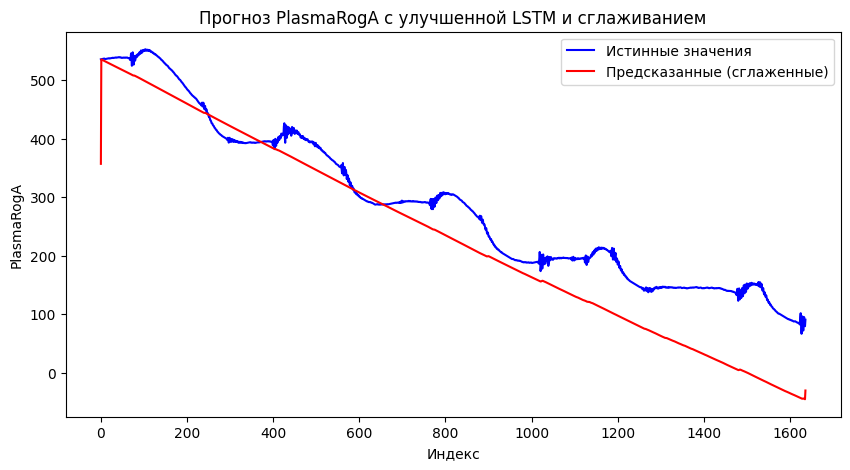

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

# 1. Импорт данных
data = pd.read_csv("plasma_data.csv")

# 2. Признаки и целевая переменная (дельта)
X = data[['I_arcSum', 'I_inj_total', 'OTor3', 'V_InjD12']]
data['PlasmaRogA_delta'] = data['PlasmaRogA'].diff().fillna(0)
y = data['PlasmaRogA_delta']

# 3. Нормализация
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1))

# 4. Последовательности для LSTM
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# 5. Улучшенная LSTM модель
model = Sequential([
    Bidirectional(LSTM(100, activation='tanh', return_sequences=True), input_shape=(X_seq.shape[1], X_seq.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 6. Обучение
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2, verbose=1)

# 7. Предсказание дельт
y_pred_scaled = model.predict(X_test)
y_pred_delta = scaler_y.inverse_transform(y_pred_scaled)

# 8. Интеграция дельт для восстановления PlasmaRogA
start_value = data['PlasmaRogA'].iloc[train_size + time_steps - 1]
y_pred = np.cumsum(y_pred_delta) + start_value
y_test_original = np.cumsum(scaler_y.inverse_transform(y_test)) + start_value

# 9. Простейшее сглаживание (скользящее среднее)
window = 3
y_pred_smooth = np.convolve(y_pred.flatten(), np.ones(window)/window, mode='same')

# 10. Визуализация
plt.figure(figsize=(10,5))
plt.plot(y_test_original, label='Истинные значения', color='blue')
plt.plot(y_pred_smooth, label='Предсказанные (сглаженные)', color='red')
plt.title('Прогноз PlasmaRogA с улучшенной LSTM и сглаживанием')
plt.xlabel('Индекс')
plt.ylabel('PlasmaRogA')
plt.legend()
plt.show()


import joblib
from tensorflow.keras.models import load_model

# 1️⃣ Сохраняем LSTM модель
model.save("plasma_lstm_model.h5")

# 2️⃣ Сохраняем масштабировщики
joblib.dump(scaler_X, "scaler_X.save")
joblib.dump(scaler_y, "scaler_y.save")

# 11. Сохранение результатов
results = pd.DataFrame({
    'PlasmaRogA_true': y_test_original.flatten(),
    'PlasmaRogA_pred': y_pred_smooth
})
results.to_csv("plasma_predictions_improved_2.csv", index=False)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


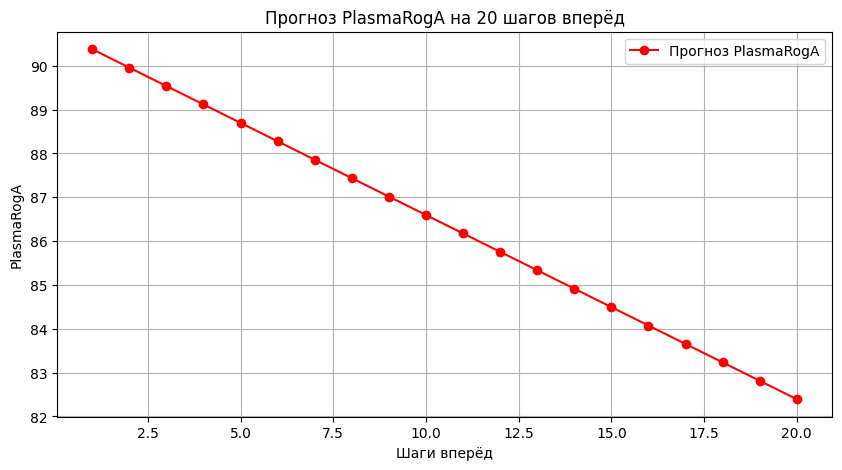

In [34]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# 1️⃣ Загружаем данные
data = pd.read_csv("plasma_data.csv")
X = data[['I_arcSum', 'I_inj_total', 'OTor3', 'V_InjD12']]
y = data['PlasmaRogA']

# 2️⃣ Загружаем модель и масштабировщики
model = load_model("plasma_lstm_model.h5", compile=False)
scaler_X = joblib.load("scaler_X.save")
scaler_y = joblib.load("scaler_y.save")

# 3️⃣ Нормализация признаков
X_scaled = scaler_X.transform(X)

# 4️⃣ Функция для создания последовательностей
def create_sequences(X, time_steps=10):
    Xs = []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
    return np.array(Xs)

time_steps = 100 # Должен совпадать с обучением
X_seq = create_sequences(X_scaled, time_steps)

last_seq = X_seq[-1]  # Последняя последовательность
future_steps = 20

# 5️⃣ Прогноз дельт
pred_deltas = []
current_seq = last_seq.copy()

for _ in range(future_steps):
    pred_scaled = model.predict(current_seq[np.newaxis, :, :])
    pred_delta = scaler_y.inverse_transform(pred_scaled)[0,0]
    pred_deltas.append(pred_delta)
    
    # Для прогноза повторяем последний шаг
    new_features = current_seq[-1]
    current_seq = np.vstack([current_seq[1:], new_features])

# 6️⃣ Восстанавливаем PlasmaRogA из дельт
start_value = y.iloc[-1]
pred_values = np.cumsum(pred_deltas) + start_value

# 7️⃣ Отдельный график будущего прогноза
plt.figure(figsize=(10,5))
plt.plot(range(1, future_steps+1), pred_values, label='Прогноз PlasmaRogA', color='red', marker='o')
plt.xlabel('Шаги вперёд')
plt.ylabel('PlasmaRogA')
plt.title('Прогноз PlasmaRogA на {} шагов вперёд'.format(future_steps))
plt.grid(True)
plt.legend()
plt.show()
